### Data Preparation

In [2]:
#importing necessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 
SongDF = pd.read_csv('song_data.csv')

In [3]:
# removing the column names to work on the data 
SongDF = SongDF.drop('song_name',axis = 1)
SongDF

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [4]:
#dropping duplicate rows
SongDF = SongDF.drop_duplicates()
SongDF

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [5]:
#No nan values in set
SongDF.isna().sum().sum()

0

In [6]:
#Dropping the categorical variables for removing outliers from the data set
WorkDF = SongDF
categoricals = WorkDF[['key','audio_mode','time_signature']]
WorkDF = WorkDF.drop(columns=['key','audio_mode','time_signature'])
WorkDF

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence
0,73,262333,0.005520,0.496,0.682,0.000029,0.0589,-4.095,0.0294,167.060,0.474
1,66,216933,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0.0498,105.256,0.370
2,76,231733,0.008170,0.737,0.463,0.447000,0.2550,-7.828,0.0792,123.881,0.324
3,74,216933,0.026400,0.451,0.970,0.003550,0.1020,-4.938,0.1070,122.444,0.198
4,56,223826,0.000954,0.447,0.766,0.000000,0.1130,-5.065,0.0313,172.011,0.574
...,...,...,...,...,...,...,...,...,...,...,...
18830,60,159645,0.893000,0.500,0.151,0.000065,0.1110,-16.107,0.0348,113.969,0.300
18831,60,205666,0.765000,0.495,0.161,0.000001,0.1050,-14.078,0.0301,94.286,0.265
18832,23,182211,0.847000,0.719,0.325,0.000000,0.1250,-12.222,0.0355,130.534,0.286
18833,55,352280,0.945000,0.488,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323


In [7]:
#Removing outliers 
Q1 = WorkDF.quantile(0.25)
Q3 = WorkDF.quantile(0.75)
IQR = Q3-Q1
WorkDF = WorkDF[~((WorkDF<(Q1 - 1.5*IQR)) | (WorkDF>(Q3+1.5*IQR))).any(axis=1)]
WorkDF

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence
0,73,262333,0.005520,0.496,0.682,0.000029,0.0589,-4.095,0.0294,167.060,0.4740
1,66,216933,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0.0498,105.256,0.3700
3,74,216933,0.026400,0.451,0.970,0.003550,0.1020,-4.938,0.1070,122.444,0.1980
4,56,223826,0.000954,0.447,0.766,0.000000,0.1130,-5.065,0.0313,172.011,0.5740
5,80,235893,0.008950,0.316,0.945,0.000002,0.3960,-3.169,0.1240,189.931,0.3200
...,...,...,...,...,...,...,...,...,...,...,...
18827,55,114582,0.898000,0.370,0.136,0.000263,0.0999,-13.528,0.0433,146.081,0.0592
18829,62,195106,0.395000,0.644,0.523,0.000000,0.0930,-7.660,0.0378,95.966,0.4450
18831,60,205666,0.765000,0.495,0.161,0.000001,0.1050,-14.078,0.0301,94.286,0.2650
18832,23,182211,0.847000,0.719,0.325,0.000000,0.1250,-12.222,0.0355,130.534,0.2860


In [8]:
# merging categoricals back to the dataframe 
merged = pd.merge(WorkDF, categoricals, left_index=True, right_index=True)
merged = merged.reset_index(drop=True)
merged

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence,key,audio_mode,time_signature
0,73,262333,0.005520,0.496,0.682,0.000029,0.0589,-4.095,0.0294,167.060,0.4740,8,1,4
1,66,216933,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0.0498,105.256,0.3700,3,0,4
2,74,216933,0.026400,0.451,0.970,0.003550,0.1020,-4.938,0.1070,122.444,0.1980,0,1,4
3,56,223826,0.000954,0.447,0.766,0.000000,0.1130,-5.065,0.0313,172.011,0.5740,10,1,4
4,80,235893,0.008950,0.316,0.945,0.000002,0.3960,-3.169,0.1240,189.931,0.3200,4,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9076,55,114582,0.898000,0.370,0.136,0.000263,0.0999,-13.528,0.0433,146.081,0.0592,7,1,4
9077,62,195106,0.395000,0.644,0.523,0.000000,0.0930,-7.660,0.0378,95.966,0.4450,4,1,4
9078,60,205666,0.765000,0.495,0.161,0.000001,0.1050,-14.078,0.0301,94.286,0.2650,11,0,4
9079,23,182211,0.847000,0.719,0.325,0.000000,0.1250,-12.222,0.0355,130.534,0.2860,0,1,4


### One-Hot Encoding
Performing regression with categorical variables doesn't always give us the best results when predicting. 
So we have decoded the categorical variables into a number of seperate, dichotomous variables. 
This is called "One-Hot Encoding".
This ensures that the results are interpretable.

In [9]:
dummies=pd.get_dummies(merged.time_signature)
merged = pd.concat([merged,dummies],axis = 'columns')
merged.rename(columns={0: 'time_signature_0',1: 'time_signature_1',2: 'time_signature_2',3:'time_signature_3',4: 'time_signature_4',5: 'time_signature_5'},inplace = True)
merged = merged.drop(columns=['time_signature'])

dummies=pd.get_dummies(merged.audio_mode)
merged=pd.concat([merged,dummies],axis='columns')
merged.rename(columns={0:'Minor',1:'Major'} ,inplace=True)
merged=merged.drop(columns=['audio_mode'])

dummies=pd.get_dummies(merged.key)
merged=pd.concat([merged,dummies],axis='columns')
merged.rename(columns={0:'C',1:'Cs/Df',2:'D',3:'Ds/Ef',4:'E',5:'F',6:'Fs/Gf',7:'G',8:'Gs/Af',9:'A',10:'As/Bf',11:'B'} ,inplace=True)
merged=merged.drop(columns=['key'])

songpopDF = merged.copy()
songpopDF

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,D,Ds/Ef,E,F,Fs/Gf,G,Gs/Af,A,As/Bf,B
0,73,262333,0.005520,0.496,0.682,0.000029,0.0589,-4.095,0.0294,167.060,...,0,0,0,0,0,0,1,0,0,0
1,66,216933,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0.0498,105.256,...,0,1,0,0,0,0,0,0,0,0
2,74,216933,0.026400,0.451,0.970,0.003550,0.1020,-4.938,0.1070,122.444,...,0,0,0,0,0,0,0,0,0,0
3,56,223826,0.000954,0.447,0.766,0.000000,0.1130,-5.065,0.0313,172.011,...,0,0,0,0,0,0,0,0,1,0
4,80,235893,0.008950,0.316,0.945,0.000002,0.3960,-3.169,0.1240,189.931,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9076,55,114582,0.898000,0.370,0.136,0.000263,0.0999,-13.528,0.0433,146.081,...,0,0,0,0,0,1,0,0,0,0
9077,62,195106,0.395000,0.644,0.523,0.000000,0.0930,-7.660,0.0378,95.966,...,0,0,1,0,0,0,0,0,0,0
9078,60,205666,0.765000,0.495,0.161,0.000001,0.1050,-14.078,0.0301,94.286,...,0,0,0,0,0,0,0,0,0,1
9079,23,182211,0.847000,0.719,0.325,0.000000,0.1250,-12.222,0.0355,130.534,...,0,0,0,0,0,0,0,0,0,0


### Dummy Variable Trap 
The dummy variable trap occurs when two or more dummy variables created by one-hot coding are highly correlated. 
Thsi means that one variable can be predicted from the others, makign it difficult to interpret predicted co-efficient variables in regression mdoels. 

In this case, we will be removing 'time_signature_3', 'Major', 'B'

In [10]:
songpopDF = songpopDF.drop(columns=['time_signature_3', 'Major','B'])
songpopDF

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,Cs/Df,D,Ds/Ef,E,F,Fs/Gf,G,Gs/Af,A,As/Bf
0,73,262333,0.005520,0.496,0.682,0.000029,0.0589,-4.095,0.0294,167.060,...,0,0,0,0,0,0,0,1,0,0
1,66,216933,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0.0498,105.256,...,0,0,1,0,0,0,0,0,0,0
2,74,216933,0.026400,0.451,0.970,0.003550,0.1020,-4.938,0.1070,122.444,...,0,0,0,0,0,0,0,0,0,0
3,56,223826,0.000954,0.447,0.766,0.000000,0.1130,-5.065,0.0313,172.011,...,0,0,0,0,0,0,0,0,0,1
4,80,235893,0.008950,0.316,0.945,0.000002,0.3960,-3.169,0.1240,189.931,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9076,55,114582,0.898000,0.370,0.136,0.000263,0.0999,-13.528,0.0433,146.081,...,0,0,0,0,0,0,1,0,0,0
9077,62,195106,0.395000,0.644,0.523,0.000000,0.0930,-7.660,0.0378,95.966,...,0,0,0,1,0,0,0,0,0,0
9078,60,205666,0.765000,0.495,0.161,0.000001,0.1050,-14.078,0.0301,94.286,...,0,0,0,0,0,0,0,0,0,0
9079,23,182211,0.847000,0.719,0.325,0.000000,0.1250,-12.222,0.0355,130.534,...,0,0,0,0,0,0,0,0,0,0


### Checking for variables to omit
We will now find out if there are any other highly correlated variables for us to omit

We will do so by plotting the correlation matrix.

In [11]:
songpopDF.corr()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,Cs/Df,D,Ds/Ef,E,F,Fs/Gf,G,Gs/Af,A,As/Bf
song_popularity,1.000000,0.038826,-0.067462,0.075455,0.003511,-0.033325,-0.040763,0.089741,0.019243,-0.029461,...,0.042609,-0.023430,-0.011897,-0.008008,-0.007565,0.025056,-0.020330,0.003665,-0.024743,0.010614
song_duration_ms,0.038826,1.000000,-0.103433,-0.087391,0.050466,0.059356,-0.017540,0.020240,-0.040543,-0.016089,...,-0.007522,0.007688,-0.011761,-0.001874,-0.002469,0.020575,-0.006262,-0.003397,-0.017958,0.007824
acousticness,-0.067462,-0.103433,1.000000,-0.108281,-0.657431,-0.021042,-0.067129,-0.511492,-0.175657,-0.096510,...,-0.055627,0.008530,0.051675,0.030744,0.033102,-0.036644,0.015228,-0.005239,0.013890,0.032616
danceability,0.075455,-0.087391,-0.108281,1.000000,0.016134,-0.023092,-0.094771,0.080553,0.218839,-0.163831,...,0.087933,-0.052259,-0.037370,-0.024744,0.009579,0.010283,-0.022075,0.003547,-0.023835,0.012999
energy,0.003511,0.050466,-0.657431,0.016134,1.000000,0.030586,0.144754,0.722949,0.180333,0.140145,...,0.015908,0.008134,-0.022193,-0.020830,-0.032165,0.023570,-0.028652,0.030774,-0.004914,-0.027765
instrumentalness,-0.033325,0.059356,-0.021042,-0.023092,0.030586,1.000000,-0.009963,-0.063236,-0.033561,0.019858,...,-0.019732,0.003167,0.008628,-0.003214,-0.014387,0.015405,0.003205,-0.001173,0.013689,0.009601
liveness,-0.040763,-0.017540,-0.067129,-0.094771,0.144754,-0.009963,1.000000,0.088754,0.055174,0.021772,...,-0.026612,0.018021,-0.023540,0.038270,-0.002190,-0.005382,0.022331,-0.025010,-0.015848,-0.021550
loudness,0.089741,0.020240,-0.511492,0.080553,0.722949,-0.063236,0.088754,1.000000,0.155254,0.070065,...,0.058102,-0.008938,-0.011028,-0.034770,-0.015139,0.019430,-0.037768,0.038586,-0.025064,-0.019417
speechiness,0.019243,-0.040543,-0.175657,0.218839,0.180333,-0.033561,0.055174,0.155254,1.000000,0.076883,...,0.063825,-0.014429,-0.022489,-0.036303,-0.032928,0.042253,-0.013829,0.028309,-0.031803,0.030324
tempo,-0.029461,-0.016089,-0.096510,-0.163831,0.140145,0.019858,0.021772,0.070065,0.076883,1.000000,...,0.001353,0.005015,-0.001790,0.001745,-0.025735,-0.001861,0.008515,-0.001711,0.003338,0.002282


<AxesSubplot:>

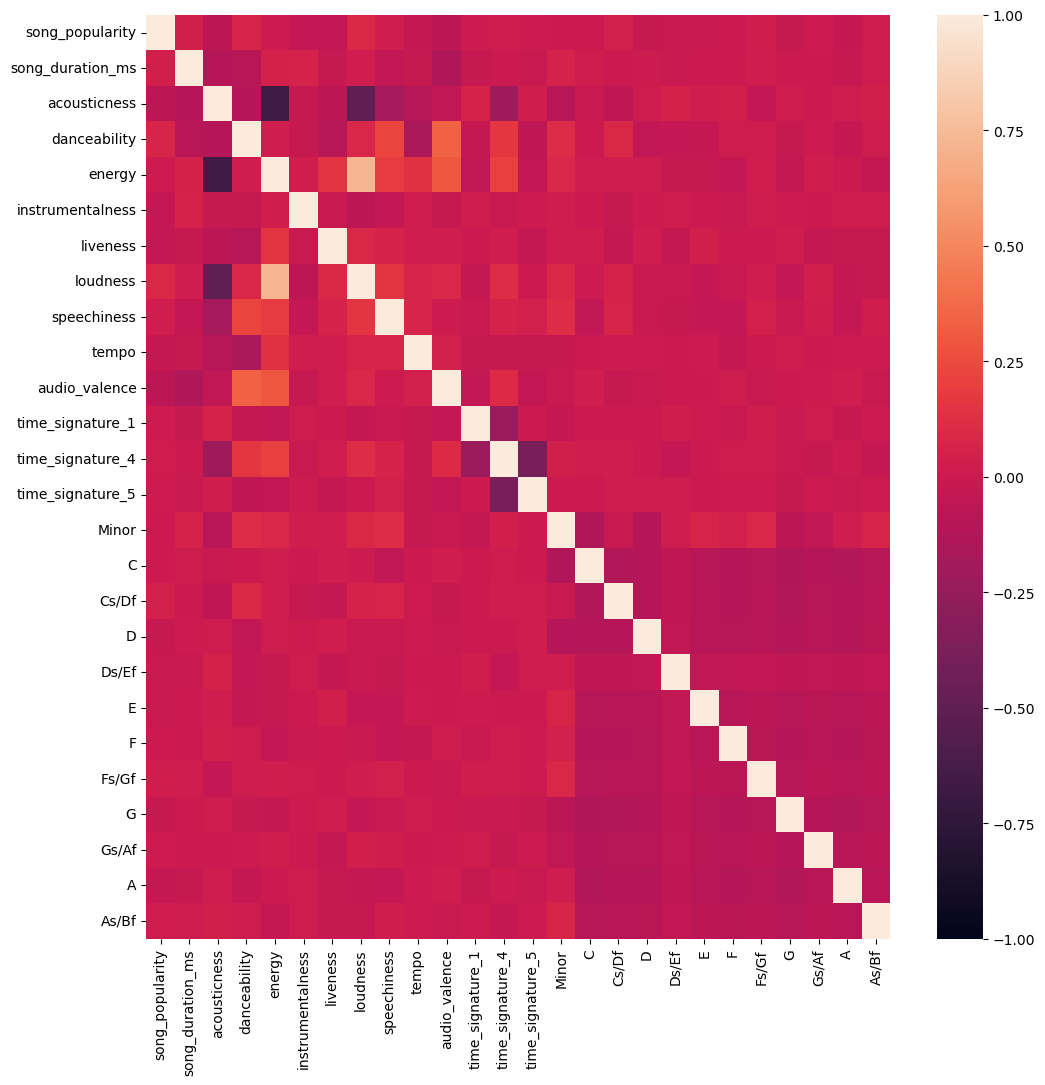

In [12]:
f = plt.figure(figsize=(12,12))
sb.heatmap(songpopDF.corr(),vmin = -1, vmax = 1)

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Most of the Correlation Values are Fairly Low. 

Few exceptions are as follows 
1. Acousticness and energy are highly negatively correlated with correlation value of -0.68.
2. Acousticness and loundness are highly negatively correlated with correlation value of -0.57.
3. Loudness and energy have a high positive correlation with correlation value of 0.77.

Though the correlation values for these pairs of variables are higher than the others, they are not high enough to omit. 

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Scaling the Data
To finish off our data preparation, we scale the data to make it easier for a model to learn and understand the problem.

In [13]:
####Scale the variables
from sklearn.preprocessing import StandardScaler
cols_to_scale = ['song_duration_ms','acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','audio_valence']
#create and fit scaler
scaler = StandardScaler()
scaler.fit(songpopDF[cols_to_scale])
#scale selected data
songpopDF[cols_to_scale] = scaler.transform(songpopDF[cols_to_scale])

songpopDF

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,Cs/Df,D,Ds/Ef,E,F,Fs/Gf,G,Gs/Af,A,As/Bf
0,73,1.164182,-0.905690,-0.915688,0.128954,-0.337292,-1.037342,0.976268,-0.838997,1.686888,...,0,0,0,0,0,0,0,1,0,0
1,66,0.070551,-0.888363,-0.600779,0.983086,-0.352820,-0.493469,0.174993,-0.399522,-0.560381,...,0,0,1,0,0,0,0,0,0,0
2,74,0.070551,-0.830004,-1.223751,1.567491,1.522136,-0.559930,0.684108,0.832732,0.064595,...,0,0,0,0,0,0,0,0,0,0
3,56,0.236595,-0.922241,-1.251135,0.548528,-0.352820,-0.438085,0.640093,-0.798065,1.866912,...,0,0,0,0,0,0,0,0,0,1
4,80,0.527274,-0.893257,-2.147940,1.442618,-0.351843,2.696662,1.297194,1.198961,2.518505,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9076,55,-2.394959,2.329374,-1.778264,-2.598273,-0.213915,-0.583192,-2.292950,-0.539551,0.924066,...,0,0,0,0,0,0,1,0,0,0
9077,62,-0.455235,0.506098,0.097497,-0.665238,-0.352820,-0.659622,-0.259263,-0.658036,-0.898177,...,0,0,0,1,0,0,0,0,0,0
9078,60,-0.200857,1.847275,-0.922534,-2.473400,-0.352118,-0.526700,-2.483565,-0.823917,-0.959264,...,0,0,0,0,0,0,0,0,0,0
9079,23,-0.765859,2.144509,0.610935,-1.654232,-0.352820,-0.305163,-1.840326,-0.707585,0.358758,...,0,0,0,0,0,0,0,0,0,0


In [14]:
##Export into csv
songpopDF.to_csv('song_data_prepared.csv')

### Train Test Split
We will be doing the train test split here, so that the same train and test sets will be given to both the numeric and categorical prediction models.


In [15]:
#First seperating the dataframe into a df containing only predicted variables and a df only containing response variable
#Predictor is a dataframe having only those columns which are predictor variables
predictor = songpopDF.drop(columns = 'song_popularity')

#response is the dataframe having only the values of song popularity 
response = pd.DataFrame(songpopDF['song_popularity'])

# splitting the data into train and test data in 80:20 ratio for machine learning 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(predictor,response,test_size = 0.20,random_state=42)

x_train.to_csv('x_train.csv')
x_test.to_csv('x_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')
